In [1]:
from util import *
import baseline
import numpy as np

from sklearn.preprocessing import StandardScaler
class OptionalStandardScaler(StandardScaler): # class taken from transfer learning paper
    def __init__(self, on=False):
        super(OptionalStandardScaler, self).__init__(with_mean=True, with_std=True)

Using Theano backend.


In [ ]:
import cPickle as pickle
audio = pickle.load( open( "train_test_sets/train-1_test-1/audio.p", "rb" ) )
test_arousal_filenames = pickle.load( open( "train_test_sets/train-1_test-1/test_arousal_filenames.p", "rb" ) )
test_arousal_audio, test_arousal_labels, dumby_doo_doo = util.split_set(test_arousal_filenames, 0.5, audio)

In [ ]:
feat = util.calcConvnetFeatures([test_arousal_audio[0]])
# concat_test_features = [np.concatenate(np.array(l)) for l in feat]
# pickle.dump(concat_test_features, open("train_test_sets/train-1_test-1/convnetTestConcatFeatures.p", 'wb'))

In [ ]:
import cPickle as pickle

In [ ]:
features = pickle.load( open( "train_test_sets/train-1_test-1/convnetFeatures.p", "rb" ) )
pickle.dump(concat_features, open("train_test_sets/train-1_test-1/convnetConcatFeatures.p", 'wb'))
print np.array(features).shape
print np.array(concat_features).shape


In [2]:
b = baseline.Model()

loaded test audio
loaded validate audio
loaded filenames


In [56]:
import matplotlib.pyplot as plt
import scipy
predictions = b.clf.predict(b.test_arousal_mfcc)
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
plt.plot(np.array(range(len(b.test_arousal_labels))), b.test_arousal_labels, color='darkorange', lw=lw, label='ground truth')
plt.xlabel('data')
plt.ylabel('arousal')
plt.title('Support Vector Regression for Arousal with MFCCs from 0.5 second audio')
plt.legend()
plt.show()
print 'pearson correlation coefficient', (np.corrcoef(predictions, b.test_arousal_labels)[0, 1])

AttributeError: Model instance has no attribute 'clf'

In [57]:
from util import *
train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 0.5, b.audio)
test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.test_valence_filenames, 0.5, b.audio)
valenceCLF = pickle.load( open( "baseline_test_1_valence.sav", "rb" ) )

In [58]:
predictions = valenceCLF.predict(calcMFCCs(test_valence_audio))
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
plt.plot(np.array(range(len(b.test_valence_labels))), b.test_valence_labels, color='darkorange', lw=lw, label='ground truth')
plt.xlabel('data')
plt.ylabel('valence')
plt.title('Support Vector Regression for Valence with MFCCs from 0.5 second audio')
plt.legend()
plt.show()
print 'pearson correlation coefficient', (np.corrcoef(predictions, b.test_valence_labels)[0, 1])

AttributeError: Model instance has no attribute 'test_valence_labels'

In [ ]:
# This JUST to generate the baseline models
for i in [-1, 0, 1, 2, 3, 4, 5]:
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 2**i, b.audio)
    test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.test_valence_filenames, 2**i, b.audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.train_arousal_filenames, 2**i, b.audio)
    test_arousal_audio, test_arousal_labels, dumby_doo_doo = split_set(b.test_arousal_filenames, 2**i, b.audio)
    length = 2**i
    len_str = str(length) if length != 0.5 else 'half'
    
    arousal_filename = 'MODEL_arousal_mfcc_'+len_str+'_seconds.sav'
    valence_filename = 'MODEL_valence_mfcc_'+len_str+'_seconds.sav'
    b.train(train_arousal_labels, calcMFCCs(train_arousal_audio), arousal_filename)
    b.train(train_valence_labels, calcMFCCs(train_valence_audio), valence_filename)

In [ ]:
# This generates the convnet features - takes very long
for i in [-1, 0, 1, 2, 3, 4, 5]:
    length = 2**i
    len_str = str(length) if length != 0.5 else 'half'
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 2**i, b.audio)
    test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.test_valence_filenames, 2**i, b.audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.train_arousal_filenames, 2**i, b.audio)
    test_arousal_audio, test_arousal_labels, dumby_doo_doo = split_set(b.test_arousal_filenames, 2**i, b.audio)
    
    train_arousal_convnet_features = calcConvnetFeatures(train_arousal_audio)
    train_arousal_filename = 'FEATURES_TRAIN_arousal_convnet_'+len_str+'_seconds.sav'
    pickle.dump(train_arousal_convnet_features, open(train_arousal_filename, 'wb'))
    
    train_valence_convnet_features = calcConvnetFeatures(train_valence_audio)
    train_valence_filename = 'FEATURES_TRAIN_valence_convnet_'+len_str+'_seconds.sav'
    pickle.dump(train_valence_convnet_features, open(train_valence_filename, 'wb'))
    
    test_arousal_convnet_features = calcConvnetFeatures(test_arousal_audio)
    test_arousal_filename = 'FEATURES_TEST_arousal_convnet_'+len_str+'_seconds.sav'
    pickle.dump(test_arousal_convnet_features, open(test_arousal_filename, 'wb'))
    
    test_valence_convnet_features = calcConvnetFeatures(test_valence_audio)
    test_valence_filename = 'FEATURES_TEST_valence_convnet_'+len_str+'_seconds.sav'
    pickle.dump(test_valence_convnet_features, open(test_valence_filename, 'wb'))

In [3]:
# This generates the convnet features for te validation set - takes long
for i in [1, 2, 3, 4, 5]:
    length = 2**i
    len_str = str(length) if length != 0.5 else 'half'
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.validate_train_valence_filenames, 2**i, b.validate_audio)
    test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.validate_test_valence_filenames, 2**i, b.validate_audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.validate_train_arousal_filenames, 2**i, b.validate_audio)
    test_arousal_audio, test_arousal_labels, dumby_doo_doo = split_set(b.validate_test_arousal_filenames, 2**i, b.validate_audio)
    
    train_arousal_convnet_features = calcConvnetFeatures(train_arousal_audio)
    train_arousal_filename = 'FEATURES_TRAIN_arousal_convnet_'+len_str+'_seconds.sav'
    pickle.dump(train_arousal_convnet_features, open(train_arousal_filename, 'wb'))
    
    train_valence_convnet_features = calcConvnetFeatures(train_valence_audio)
    train_valence_filename = 'FEATURES_TRAIN_valence_convnet_'+len_str+'_seconds.sav'
    pickle.dump(train_valence_convnet_features, open(train_valence_filename, 'wb'))
    
    test_arousal_convnet_features = calcConvnetFeatures(test_arousal_audio)
    test_arousal_filename = 'FEATURES_TEST_arousal_convnet_'+len_str+'_seconds.sav'
    pickle.dump(test_arousal_convnet_features, open(test_arousal_filename, 'wb'))
    
    test_valence_convnet_features = calcConvnetFeatures(test_valence_audio)
    test_valence_filename = 'FEATURES_TEST_valence_convnet_'+len_str+'_seconds.sav'
    pickle.dump(test_valence_convnet_features, open(test_valence_filename, 'wb'))

On file 1 out of 363
On file 2 out of 363
On file 3 out of 363
On file 4 out of 363
On file 5 out of 363
On file 6 out of 363
On file 7 out of 363
On file 8 out of 363
On file 9 out of 363
On file 10 out of 363
On file 11 out of 363
On file 12 out of 363
On file 13 out of 363
On file 14 out of 363
On file 15 out of 363
On file 16 out of 363
On file 17 out of 363
On file 18 out of 363
On file 19 out of 363
On file 20 out of 363
On file 21 out of 363
On file 22 out of 363
On file 23 out of 363
On file 24 out of 363
On file 25 out of 363
On file 26 out of 363
On file 27 out of 363
On file 28 out of 363
On file 29 out of 363
On file 30 out of 363
On file 31 out of 363
On file 32 out of 363
On file 33 out of 363
On file 34 out of 363
On file 35 out of 363
On file 36 out of 363
On file 37 out of 363
On file 38 out of 363
On file 39 out of 363
On file 40 out of 363
On file 41 out of 363
On file 42 out of 363
On file 43 out of 363
On file 44 out of 363
On file 45 out of 363
On file 46 out of 3

On file 362 out of 363
On file 363 out of 363
On file 1 out of 363
On file 2 out of 363
On file 3 out of 363
On file 4 out of 363
On file 5 out of 363
On file 6 out of 363
On file 7 out of 363
On file 8 out of 363
On file 9 out of 363
On file 10 out of 363
On file 11 out of 363
On file 12 out of 363
On file 13 out of 363
On file 14 out of 363
On file 15 out of 363
On file 16 out of 363
On file 17 out of 363
On file 18 out of 363
On file 19 out of 363
On file 20 out of 363
On file 21 out of 363
On file 22 out of 363
On file 23 out of 363
On file 24 out of 363
On file 25 out of 363
On file 26 out of 363
On file 27 out of 363
On file 28 out of 363
On file 29 out of 363
On file 30 out of 363
On file 31 out of 363
On file 32 out of 363
On file 33 out of 363
On file 34 out of 363
On file 35 out of 363
On file 36 out of 363
On file 37 out of 363
On file 38 out of 363
On file 39 out of 363
On file 40 out of 363
On file 41 out of 363
On file 42 out of 363
On file 43 out of 363
On file 44 out of

On file 360 out of 363
On file 361 out of 363
On file 362 out of 363
On file 363 out of 363
On file 1 out of 300
On file 2 out of 300
On file 3 out of 300
On file 4 out of 300
On file 5 out of 300
On file 6 out of 300
On file 7 out of 300
On file 8 out of 300
On file 9 out of 300
On file 10 out of 300
On file 11 out of 300
On file 12 out of 300
On file 13 out of 300
On file 14 out of 300
On file 15 out of 300
On file 16 out of 300
On file 17 out of 300
On file 18 out of 300
On file 19 out of 300
On file 20 out of 300
On file 21 out of 300
On file 22 out of 300
On file 23 out of 300
On file 24 out of 300
On file 25 out of 300
On file 26 out of 300
On file 27 out of 300
On file 28 out of 300
On file 29 out of 300
On file 30 out of 300
On file 31 out of 300
On file 32 out of 300
On file 33 out of 300
On file 34 out of 300
On file 35 out of 300
On file 36 out of 300
On file 37 out of 300
On file 38 out of 300
On file 39 out of 300
On file 40 out of 300
On file 41 out of 300
On file 42 out 

On file 61 out of 392
On file 62 out of 392
On file 63 out of 392
On file 64 out of 392
On file 65 out of 392
On file 66 out of 392
On file 67 out of 392
On file 68 out of 392
On file 69 out of 392
On file 70 out of 392
On file 71 out of 392
On file 72 out of 392
On file 73 out of 392
On file 74 out of 392
On file 75 out of 392
On file 76 out of 392
On file 77 out of 392
On file 78 out of 392
On file 79 out of 392
On file 80 out of 392
On file 81 out of 392
On file 82 out of 392
On file 83 out of 392
On file 84 out of 392
On file 85 out of 392
On file 86 out of 392
On file 87 out of 392
On file 88 out of 392
On file 89 out of 392
On file 90 out of 392
On file 91 out of 392
On file 92 out of 392
On file 93 out of 392
On file 94 out of 392
On file 95 out of 392
On file 96 out of 392
On file 97 out of 392
On file 98 out of 392
On file 99 out of 392
On file 100 out of 392
On file 101 out of 392
On file 102 out of 392
On file 103 out of 392
On file 104 out of 392
On file 105 out of 392
On f

On file 29 out of 191
On file 30 out of 191
On file 31 out of 191
On file 32 out of 191
On file 33 out of 191
On file 34 out of 191
On file 35 out of 191
On file 36 out of 191
On file 37 out of 191
On file 38 out of 191
On file 39 out of 191
On file 40 out of 191
On file 41 out of 191
On file 42 out of 191
On file 43 out of 191
On file 44 out of 191
On file 45 out of 191
On file 46 out of 191
On file 47 out of 191
On file 48 out of 191
On file 49 out of 191
On file 50 out of 191
On file 51 out of 191
On file 52 out of 191
On file 53 out of 191
On file 54 out of 191
On file 55 out of 191
On file 56 out of 191
On file 57 out of 191
On file 58 out of 191
On file 59 out of 191
On file 60 out of 191
On file 61 out of 191
On file 62 out of 191
On file 63 out of 191
On file 64 out of 191
On file 65 out of 191
On file 66 out of 191
On file 67 out of 191
On file 68 out of 191
On file 69 out of 191
On file 70 out of 191
On file 71 out of 191
On file 72 out of 191
On file 73 out of 191
On file 74

On file 12 out of 160
On file 13 out of 160
On file 14 out of 160
On file 15 out of 160
On file 16 out of 160
On file 17 out of 160
On file 18 out of 160
On file 19 out of 160
On file 20 out of 160
On file 21 out of 160
On file 22 out of 160
On file 23 out of 160
On file 24 out of 160
On file 25 out of 160
On file 26 out of 160
On file 27 out of 160
On file 28 out of 160
On file 29 out of 160
On file 30 out of 160
On file 31 out of 160
On file 32 out of 160
On file 33 out of 160
On file 34 out of 160
On file 35 out of 160
On file 36 out of 160
On file 37 out of 160
On file 38 out of 160
On file 39 out of 160
On file 40 out of 160
On file 41 out of 160
On file 42 out of 160
On file 43 out of 160
On file 44 out of 160
On file 45 out of 160
On file 46 out of 160
On file 47 out of 160
On file 48 out of 160
On file 49 out of 160
On file 50 out of 160
On file 51 out of 160
On file 52 out of 160
On file 53 out of 160
On file 54 out of 160
On file 55 out of 160
On file 56 out of 160
On file 57

On file 13 out of 96
On file 14 out of 96
On file 15 out of 96
On file 16 out of 96
On file 17 out of 96
On file 18 out of 96
On file 19 out of 96
On file 20 out of 96
On file 21 out of 96
On file 22 out of 96
On file 23 out of 96
On file 24 out of 96
On file 25 out of 96
On file 26 out of 96
On file 27 out of 96
On file 28 out of 96
On file 29 out of 96
On file 30 out of 96
On file 31 out of 96
On file 32 out of 96
On file 33 out of 96
On file 34 out of 96
On file 35 out of 96
On file 36 out of 96
On file 37 out of 96
On file 38 out of 96
On file 39 out of 96
On file 40 out of 96
On file 41 out of 96
On file 42 out of 96
On file 43 out of 96
On file 44 out of 96
On file 45 out of 96
On file 46 out of 96
On file 47 out of 96
On file 48 out of 96
On file 49 out of 96
On file 50 out of 96
On file 51 out of 96
On file 52 out of 96
On file 53 out of 96
On file 54 out of 96
On file 55 out of 96
On file 56 out of 96
On file 57 out of 96
On file 58 out of 96
On file 59 out of 96
On file 60 ou

On file 25 out of 48
On file 26 out of 48
On file 27 out of 48
On file 28 out of 48
On file 29 out of 48
On file 30 out of 48
On file 31 out of 48
On file 32 out of 48
On file 33 out of 48
On file 34 out of 48
On file 35 out of 48
On file 36 out of 48
On file 37 out of 48
On file 38 out of 48
On file 39 out of 48
On file 40 out of 48
On file 41 out of 48
On file 42 out of 48
On file 43 out of 48
On file 44 out of 48
On file 45 out of 48
On file 46 out of 48
On file 47 out of 48
On file 48 out of 48
On file 1 out of 48
On file 2 out of 48
On file 3 out of 48
On file 4 out of 48
On file 5 out of 48
On file 6 out of 48
On file 7 out of 48
On file 8 out of 48
On file 9 out of 48
On file 10 out of 48
On file 11 out of 48
On file 12 out of 48
On file 13 out of 48
On file 14 out of 48
On file 15 out of 48
On file 16 out of 48
On file 17 out of 48
On file 18 out of 48
On file 19 out of 48
On file 20 out of 48
On file 21 out of 48
On file 22 out of 48
On file 23 out of 48
On file 24 out of 48
O

In [ ]:
# This JUST to generate the convnet models
for i in [-1, 0, 1, 2, 3, 4, 5]:
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 2**i, b.audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.train_arousal_filenames, 2**i, b.audio)
    
    length = 2**i
    len_str = str(length) if length != 0.5 else 'half'
    
    arousal_filename = 'MODEL_arousal_convnet_'+len_str+'_seconds.sav'
    valence_filename = 'MODEL_valence_convnet_'+len_str+'_seconds.sav'
    
    train_arousal_convnet_features = pickle.load( open( "convnet_features/FEATURES_TRAIN_arousal_convnet_"+len_str+"_seconds.sav", "rb" ) )
    train_valence_convnet_features = pickle.load( open( "convnet_features/FEATURES_TRAIN_valence_convnet_"+len_str+"_seconds.sav", "rb" ) )
    
    b.train(train_arousal_labels, train_arousal_convnet_features, arousal_filename)
    b.train(train_valence_labels, train_valence_convnet_features, valence_filename)

In [4]:
# This JUST to generate the convnet models for validation set - takes long
for i in [1, 2, 3, 4]:
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.validate_train_valence_filenames, 2**i, b.validate_audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.validate_train_arousal_filenames, 2**i, b.validate_audio)
    
    length = 2**i
    len_str = str(length) if length != 0.5 else 'half'
    
    arousal_filename = 'MODEL_arousal_convnet_'+len_str+'_seconds.sav'
    valence_filename = 'MODEL_valence_convnet_'+len_str+'_seconds.sav'
    
    train_arousal_convnet_features = pickle.load( open( "validate_convnet_features/FEATURES_TRAIN_arousal_convnet_"+len_str+"_seconds.sav", "rb" ) )
    train_valence_convnet_features = pickle.load( open( "validate_convnet_features/FEATURES_TRAIN_valence_convnet_"+len_str+"_seconds.sav", "rb" ) )
    
    b.train(train_arousal_labels, train_arousal_convnet_features, arousal_filename)
    b.train(train_valence_labels, train_valence_convnet_features, valence_filename)

training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.8028983853, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.177636478749, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.3253197041, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.8028983853, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0918s.) Setting batch_size=4.


[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.177636478749, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.3253197041, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.8948963956, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0407320432723, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.7353601879, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, c

[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    0.6s


[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.58972602017, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.17340448053, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.17340448053, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-7.53234647726, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf

[Parallel(n_jobs=3)]: Done  25 tasks      | elapsed:    1.2s


[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.83935228493, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.355542771406, total=   0.1s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.355542771406, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.80600240699, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.80600240699, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-7.564616913

[Parallel(n_jobs=3)]: Done  60 tasks      | elapsed:    2.5s


[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.38039014926, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-3.8846711653, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.51639322202, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-3.8846711653, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-4.87794086815, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2

[Parallel(n_jobs=3)]: Done  96 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Batch computation too slow (2.0031s.) Setting batch_size=2.


[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-5.25736173446, total=   0.1s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-7.24451302358, total=   0.2s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-5.69760862023, total=   0.1s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-7.24451302358, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-2.6745238811, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, 

[Parallel(n_jobs=3)]: Done 140 tasks      | elapsed:    5.4s


[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-5.25736173446, total=   0.1s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-5.25736173446, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-7.58657613042, total=   0.1s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-7.24451302358, total=   0.1s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-4.42452225102, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, 

[Parallel(n_jobs=3)]: Batch computation too slow (2.5204s.) Setting batch_size=1.


[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-2.96757411877, total=   0.1s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-5.25506629431, total=   0.2s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-4.40910219746, total=   0.1s
[CV] clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-9.80618542549, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf ....
[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-6.95006123419, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf_

[Parallel(n_jobs=3)]: Done 189 out of 192 | elapsed:    8.3s remaining:    0.1s
[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    8.4s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.4416418091, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.12884238083, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.0163956853, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.4416418091, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.12884238083, total=   0.0s


[Parallel(n_jobs=3)]: Batch computation too fast (0.0992s.) Setting batch_size=16.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0992s.) Setting batch_size=4.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.3s


[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.0163956853, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.3204916437, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.26474619586, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.1362998417, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.3204916437, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    1.3s


[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.0527134736, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-18.1614775868, total=   0.1s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.71415124084, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.30386781467, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-18.1614775868, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  cl

[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.0837973704, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-17.0242121024, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-2.8809193968, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-20.9739189482, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-3.10488342591, total=   0.1s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-9.7117525837

[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-3.88939101233, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-24.59029504, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-18.8217835411, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-4.15199616023, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-6.15383980093, total=   0.1s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV]  cl

[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-18.0411255806, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-20.4385819874, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-11.0837973704, total=   0.1s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-2.94453414265, total=   0.1s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-4.94581346201, total=   0.1s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=auto,

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:  2.1min finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.994871866, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.202549005019, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.4411034906, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.994871866, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.202549005019, total=   0.0s


[Parallel(n_jobs=3)]: Batch computation too fast (0.0603s.) Setting batch_size=38.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0603s.) Setting batch_size=6.


[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.4411034906, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.1124955033, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0581911796993, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.8596631165, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.1124955033, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, 

[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.00337301864, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.5221883156, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-6.47399675218, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-3.92450205726, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.09747777359, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[C

[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   9 out of 192 | elapsed:    1.8s remaining:   36.5s


[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-3.4594395593, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.63129474944, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.7231345776, total=   0.1s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-5.86804026346, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-11.7231345776, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.182377175588

[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-8.848868649, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-8.67268009459, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-0.158539604025, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-2.71836208073, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.0523818959, total=   0.0s
[CV] clf__gamma=0.0078125,

[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-3.81798069486, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-3.22220849222, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-4.16393877181, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-6.05054408821, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-3.24569397062, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, c

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    4.4s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-25.9474257353, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.19417180476, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.7774355985, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-25.9474257353, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.19417180476, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf_

[Parallel(n_jobs=3)]: Batch computation too fast (0.0531s.) Setting batch_size=6.


[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.9153953282, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-2.57622994137, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.26719936351, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-22.7970668013, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.1101680194, total=   0.0s
[CV] clf__gamma=0.001953125, stdd

[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.5s


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.18428438648, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-21.9720618705, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.01424629397, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.0588376781, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.81507196715, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  

[Parallel(n_jobs=3)]: Done  36 tasks      | elapsed:    0.9s


[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-10.2053823383, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.988849183043, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.5105085997, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.7244968472, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-23.1423002623, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd_

[Parallel(n_jobs=3)]: Done  78 tasks      | elapsed:    1.7s


[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-2.4871255297, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-10.2053823383, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.7244968472, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-20.1079307828, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-23.1423002623, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-18.678018503

[Parallel(n_jobs=3)]: Done 120 tasks      | elapsed:    2.4s


[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.988849183043, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-2.4871255297, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-3.80237488654, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-11.7244968472, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-10.2053823383, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-8.73439076145, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=3

[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-7.1822175597, total=   0.0s
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-6.06254664963, total=   0.0s
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-7.1822175597, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-7.1822175597, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-18.0102548053, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-6.06254664963, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-7.1822175597, total=   0.0s


[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    3.5s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.1514741285, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0900049947397, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-13.2416736672, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.1514741285, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.0900049947397, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, 

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1427s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.3s


[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.2773509337, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.00974071704117, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.2773509337, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-13.8148225209, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-13.8148225209, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=Fals

[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    0.6s


[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.236631527121, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.111622079588, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.88535020508, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.88535020508, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-12.2687006681, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__o

[Parallel(n_jobs=3)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  46 tasks      | elapsed:    1.0s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-12.1506170739, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-2.35397568605, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-6.64158656945, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.35397568605, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-6.87107007241, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, sco

[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    1.3s


[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-1.39708227982, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-11.7603087289, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-11.0891658024, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.126914110531, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.3366892621, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.0891658024, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.12

[Parallel(n_jobs=3)]: Done  86 tasks      | elapsed:    1.6s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.5136279604, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-1.10525257355, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-8.96251184577, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-12.1506170739, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-2.35397568605, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-6.64158656945, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=

[Parallel(n_jobs=3)]: Done 108 tasks      | elapsed:    2.0s


[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-11.0891658024, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-6.14338230093, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-1.39708227982, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.3366892621, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.0891658024, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__

[Parallel(n_jobs=3)]: Done 134 tasks      | elapsed:    2.4s


[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-4.83910937021, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-6.97540417089, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-4.83910937021, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-2.72331268644, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-6.36959927857, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-2.83756255009, total=   0.0s
[CV] c

[Parallel(n_jobs=3)]: Done 160 tasks      | elapsed:    2.8s


[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-6.1013848166, total=   0.0s
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-4.12358042735, total=   0.0s
[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-2.90000162583, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-2.90000162583, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-6.1013848166, total=   0.0s
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-6.1013848166, total=   0.0s
[CV]  stdd__on=False, clf__C=8.0, clf__k

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    3.2s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-23.7360841178, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.04836577809, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.8723837961, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-23.7360841178, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.04836577809, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf_

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0822s.) Setting batch_size=4.


[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-1.14192773913, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.9969113561, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-20.9040440035, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.35042750882, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.4995112597, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on

[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.3s


[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.89541867367, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-18.0779172798, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.89541867367, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-2.41292699165, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-18.8422838241, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.52431358829, total=   0.0s
[CV]  clf__gamma=0.0001220703125, s

[Parallel(n_jobs=3)]: Done  17 tasks      | elapsed:    0.8s


[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.692007594603, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.692007594603, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.916181533496, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.916181533496, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.5174983283, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-11.6890826683, total=   0.0s
[CV]  cl

[Parallel(n_jobs=3)]: Done  32 tasks      | elapsed:    1.2s


[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-10.5175949803, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.85321446231, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.11266913731, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-16.2091157041, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-17.3936963937, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=

[Parallel(n_jobs=3)]: Done  76 tasks      | elapsed:    1.7s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-1.7767455532, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-11.6890826683, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-10.5175949803, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-7.85321446231, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-21.04049897, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-10.5175949803,

[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-1.7767455532, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-3.44179645594, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-3.44179645594, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-10.5175949803, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-7.85321446231, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf

[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-6.65211627571, total=   0.0s


[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    3.2s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-12.8660860016, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.182464190166, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.9406727693, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-12.8660860016, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.182464190166, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0544s.) Setting batch_size=6.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.2s


[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.00753657441896, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.127835710756, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-12.9665843479, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-12.218727748, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=0.00753657441896, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00195312

[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.5s


[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.9240338607, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.2002433192, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-11.7615250544, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-13.872416854, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.7810692506, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-12.8625120518, 

[Parallel(n_jobs=3)]: Done  36 tasks      | elapsed:    0.8s


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.70216055741, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.39978977698, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-11.9577070348, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-2.2645484641, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__o

[Parallel(n_jobs=3)]: Done  78 tasks      | elapsed:    1.3s


[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-7.69927195337, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-11.20532287, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-11.9577070348, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-1.92344998013, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-2.29800518731, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-13

[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-11.20532287, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.0432329250469, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.591863068904, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 


[Parallel(n_jobs=3)]: Done 120 tasks      | elapsed:    1.8s


[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-13.526305941, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-1.92344998013, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-11.9577070348, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-7.39978977698, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-7.69927195337, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-6.20181727185, total=   0.0s
[CV] clf__gamma=0.0001220703125

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    2.5s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-19.2205223632, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.881178926868, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-12.035175992, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-19.2205223632, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.881178926868, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf

[Parallel(n_jobs=3)]: Batch computation too fast (0.0336s.) Setting batch_size=10.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.1s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-11.114217866, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-17.1168845028, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-16.5008316788, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-14.7320868062, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.56608788237, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.97973656922, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, 

[Parallel(n_jobs=3)]: Done  34 tasks      | elapsed:    0.6s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-17.2059959845, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.05185185443, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.815524521827, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-3.62439204072, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-10.0665621883, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.23437391471

[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-18.8324887308, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-7.23437391471, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-12.6627644081, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-17.2059959845, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-14.5075833116, total=   0.0s
[CV]

[Parallel(n_jobs=3)]: Done  84 tasks      | elapsed:    1.8s


[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-5.94011848006, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-10.0665621883, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-3.62439204072, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-12.6627644081, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-7.23437391471, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-14.5075833116, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.000488281

[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-2.05185185443, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-5.78331200059, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-5.78331200059, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-12.8597560809, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-13.18039

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    3.5s finished


In [121]:
def plot_results(length, label_type, modelType='mfcc'):
    len_str = str(length) if length != 0.5 else 'half'
    clf = None
    test_audio = None
    test_labels = None
    if label_type == 'valence':
        test_audio, dumby_doo_doo, test_labels = split_set(b.validate_test_valence_filenames, length, b.validate_audio)
        clf = pickle.load( open( modelType+"_models/MODEL_valence_"+modelType+"_"+len_str+"_seconds.sav", "rb" ) )
        train_filenames = b.train_valence_filenames
    else:
        test_audio, test_labels, dumby_doo_doo = split_set(b.validate_test_arousal_filenames, length, b.validate_audio)
        clf = pickle.load( open( modelType+"_models/MODEL_arousal_"+modelType+"_"+len_str+"_seconds.sav", "rb" ) )
        train_filenames = b.train_arousal_filenames
    if modelType == 'mfcc':
        feats = calcMFCCs(test_audio)
        train_audio, dumby_doo_doo, train_labels = split_set(train_filenames, length, b.audio)
        clf = clf.best_estimator_.fit(calcMFCCs(train_audio), train_labels)
    else:
        feats = pickle.load( open( "validate_convnet_features/FEATURES_TEST_"+label_type+"_convnet_"+len_str+"_seconds.sav", "rb" ) )
        train_audio, dumby_doo_doo, train_labels = split_set(train_filenames, length, b.audio)
        train_convnet_features = pickle.load( open( "convnet_features/FEATURES_TRAIN_"+label_type+"_convnet_"+len_str+"_seconds.sav", "rb" ) )
        clf = clf.best_estimator_.fit(train_convnet_features, train_labels)
    predictions = clf.predict(feats)
    lw = 2
    plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
    plt.plot(np.array(range(len(test_labels))), test_labels, color='darkorange', lw=lw, label='ground truth')
    plt.xlabel('data')
    plt.ylabel(label_type)
    plt.title('Support Vector Regression for '+label_type+' with '+modelType+'\'s from '+len_str+' second audio')
    plt.legend()
    plt.show()
    print 'r squared:', (np.corrcoef(predictions, test_labels)[0, 1] ** 2)
    print 'r:', (np.corrcoef(predictions, test_labels)[0, 1])
    print 'mse:', np.mean(((predictions - test_labels) ** 2))

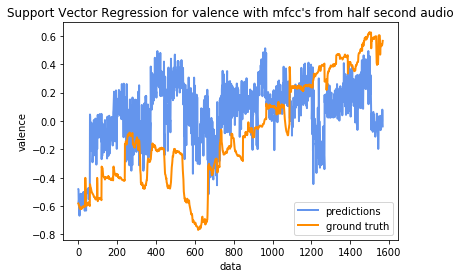

r squared: 0.13762262504
r: 0.370975235077
mse: 0.146917330506


In [260]:
plot_results(.5, 'valence', 'mfcc')

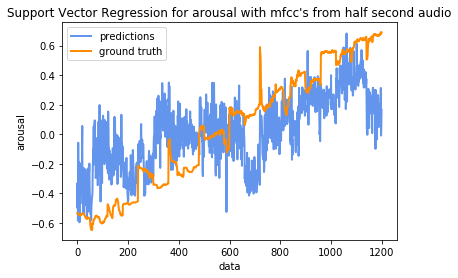

r squared: 0.482615628985
r: 0.694705426051
mse: 0.0857955456307


In [261]:
plot_results(.5, 'arousal', 'mfcc')

In [ ]:
import matplotlib.pyplot as plt
clf = pickle.load( open( "convnet_test_1_arousal.sav", "rb" ) )
predictions = clf.predict(concat_test_features)
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw)
plt.plot(np.array(range(len(test_arousal_labels))), test_arousal_labels, color='darkorange', lw=lw)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression with ConvNew Features from 0.5 second audio')
plt.legend()
plt.show()

In [151]:
#file_names, audio, convnet_feature_prefix, convnet_model_prefix, mfcc_model_prefix
data_info = {
    "valence_1_train":
    [b.train_valence_filenames, 
     b.audio,
     "convnet_features/FEATURES_TRAIN_valence_convnet_",
     "convnet_models/MODEL_valence_convnet_",
     "mfcc_models/MODEL_valence_mfcc_"
    ],
    "valence_1_test":
    [b.test_valence_filenames, 
     b.audio,
     "convnet_features/FEATURES_TEST_valence_convnet_",
     "convnet_models/MODEL_valence_convnet_",
     "mfcc_models/MODEL_valence_mfcc_"
    ],
    "valence_2_train":
    [b.validate_train_valence_filenames, 
     b.validate_audio,
     "validate_convnet_features/FEATURES_TRAIN_valence_convnet_",
     "convnet_models/MODEL_valence_convnet_",
     "mfcc_models/MODEL_valence_mfcc_"
    ],
    "valence_2_test":
    [b.validate_test_valence_filenames, 
     b.validate_audio,
     "validate_convnet_features/FEATURES_TEST_valence_convnet_",
     "convnet_models/MODEL_valence_convnet_",
     "mfcc_models/MODEL_valence_mfcc_"
    ],
    "arousal_1_train":
    [b.train_arousal_filenames, 
     b.audio,
     "convnet_features/FEATURES_TRAIN_arousal_convnet_",
     "convnet_models/MODEL_arousal_convnet_",
     "mfcc_models/MODEL_arousal_mfcc_"
    ],
    "arousal_1_test":
    [b.test_arousal_filenames, 
     b.audio,
     "convnet_features/FEATURES_TEST_arousal_convnet_",
     "convnet_models/MODEL_arousal_convnet_",
     "mfcc_models/MODEL_arousal_mfcc_"
    ],
    "arousal_2_train":
    [b.validate_train_arousal_filenames, 
     b.validate_audio,
     "validate_convnet_features/FEATURES_TRAIN_arousal_convnet_",
     "convnet_models/MODEL_arousal_convnet_",
     "mfcc_models/MODEL_arousal_mfcc_"
    ],
    "arousal_2_test":
    [b.validate_test_arousal_filenames, 
     b.validate_audio,
     "validate_convnet_features/FEATURES_TEST_arousal_convnet_",
     "convnet_models/MODEL_arousal_convnet_",
     "mfcc_models/MODEL_arousal_mfcc_"
    ],
}

In [284]:
#returns feat_names, candidate_svms, train_feature_vectors, test_feature_vectors,...
#validate_feature_vectors, train_label_vectors, test_label_vectors, validate_label_vectors
#can be this/other_2/1_train/test
def prepare_multiple(
    train_config=['this_1_train',], 
    test_config=['this_1_test'],
    validate_config=['this_2_test'],
    label_type="arousal"):
    
    other_type = "valence" if label_type == "arousal" else "arousal"
    train_set_config = [spec.replace("this", label_type).replace("other", other_type) for spec in train_config]
    test_set_config = [spec.replace("this", label_type).replace("other", other_type) for spec in test_config]
    validate_set_config = [spec.replace("this", label_type).replace("other", other_type) for spec in validate_config]
    
    feat_names = []
    candidate_svms = []
    train_feature_vectors = []
    test_feature_vectors = []
    validate_feature_vectors = []
    train_label_vectors = []
    test_label_vectors = []
    validate_label_vectors = []
    
    for i in [-1, 0, 1, 2, 3, 4]:
        length = 2**i
        len_str = str(length) if length != 0.5 else 'half'
        
        print("processing " + str(i) + ", will end at 4.")
        
        #prepare train set
        train_mfcc_features = []
        train_convnet_features = []
        train_labels = []
        print "\t (1/3) preparing train set... "
        for train_model_spec in train_set_config:
            [file_names, raw_audio, convnet_feature_prefix, convnet_model_prefix, mfcc_model_prefix] = data_info[train_model_spec]
            split_audio, arousal_labels, valence_labels = split_set(file_names, 2**i, raw_audio)
            labels = arousal_labels if label_type == "arousal" else valence_labels
            if length >= 2:
                convnet_features = pickle.load( open( convnet_feature_prefix+len_str+"_seconds.sav", "rb" ) )
                train_convnet_features = train_convnet_features + convnet_features
            mfcc_features = calcMFCCs(split_audio)
            train_mfcc_features = train_mfcc_features + mfcc_features
            train_labels = train_labels + labels
        #prepare test set
        test_mfcc_features = []
        test_convnet_features = []
        test_labels = []
        print "\t (2/3) preparing test set... "
        for test_model_spec in test_set_config:
            [file_names, raw_audio, convnet_feature_prefix, convnet_model_prefix, mfcc_model_prefix] = data_info[test_model_spec]
            split_audio, arousal_labels, valence_labels = split_set(file_names, 2**i, raw_audio)
            labels = arousal_labels if label_type == "arousal" else valence_labels
            if length >= 2:
                convnet_features = pickle.load( open( convnet_feature_prefix+len_str+"_seconds.sav", "rb" ) )
                test_convnet_features = test_convnet_features + convnet_features
            mfcc_features = calcMFCCs(split_audio)
            test_mfcc_features = test_mfcc_features + mfcc_features
            test_labels = test_labels + labels
        #prepare validate set
        validate_mfcc_features = []
        validate_convnet_features = []
        validate_labels = []
        print "\t (3/3) preparing validate set... "
        for validate_model_spec in validate_set_config:
            [file_names, raw_audio, convnet_feature_prefix, convnet_model_prefix, mfcc_model_prefix] = data_info[validate_model_spec]
            split_audio, arousal_labels, valence_labels = split_set(file_names, 2**i, raw_audio)
            labels = arousal_labels if label_type == "arousal" else valence_labels
            if length >= 2:
                convnet_features = pickle.load( open( convnet_feature_prefix+len_str+"_seconds.sav", "rb" ) )
                validate_convnet_features = validate_convnet_features + convnet_features
            mfcc_features = calcMFCCs(split_audio)
            validate_mfcc_features = validate_mfcc_features + mfcc_features
            validate_labels = validate_labels + labels
            
        if length >= 2:
            convnet_clf = pickle.load( open( "convnet_models/MODEL_"+label_type+"_convnet_"+len_str+"_seconds.sav", "rb" ) )
            candidate_svms.append(convnet_clf)
            feat_names.append("convnet_"+ len_str)
            train_convnet_features, test_convnet_features, validate_convnet_features = norm_with_validate(
                train_convnet_features, test_convnet_features, validate_convnet_features)
            train_feature_vectors.append(train_convnet_features)
            test_feature_vectors.append(test_convnet_features)
            validate_feature_vectors.append(validate_convnet_features)
            train_label_vectors.append(train_labels)
            test_label_vectors.append(test_labels)
            validate_label_vectors.append(validate_labels)
            
        mfcc_clf = pickle.load( open( "mfcc_models/MODEL_"+label_type+"_mfcc_"+len_str+"_seconds.sav", "rb" ) )
        candidate_svms.append(mfcc_clf)
        feat_names.append("mfcc_"+ len_str)
        train_mfcc_features, test_mfcc_features, validate_mfcc_features = norm_with_validate(
                train_mfcc_features, test_mfcc_features, validate_mfcc_features)
        train_feature_vectors.append(train_mfcc_features)
        test_feature_vectors.append(test_mfcc_features)
        validate_feature_vectors.append(validate_mfcc_features)
        train_label_vectors.append(train_labels)
        test_label_vectors.append(test_labels)
        validate_label_vectors.append(validate_labels)
    print "DONE"
    return feat_names, candidate_svms, train_feature_vectors, test_feature_vectors, validate_feature_vectors, train_label_vectors, test_label_vectors, validate_label_vectors



In [285]:
feat_names, candidate_svms, train_feature_vectors, test_feature_vectors, validate_feature_vectors, train_label_vectors, test_label_vectors, validate_label_vectors = prepare_multiple()




processing -1, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
processing 0, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
processing 1, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
processing 2, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
processing 3, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
processing 4, will end at 4.
	 (1/3) preparing train set... 
	 (2/3) preparing test set... 
	 (3/3) preparing validate set... 
DONE


In [297]:
selected_feature_indexes, best_performance, best_svm = forward_select(candidate_svms, 
                                                                      train_feature_vectors, 
                                                                      train_label_vectors, 
                                                                      test_feature_vectors, 
                                                                      test_label_vectors, 
                                                                      "mse")

In [298]:
[feat_names[idx] for idx in selected_feature_indexes]

['convnet_16']

In [304]:
def plot_from_forward_selection(feat_indexes, model, label_type="arousal"):
    feature_vectors_validate = [validate_feature_vectors[i] for i in feat_indexes]
    label_vectors_validate = [validate_label_vectors[i] for i in feat_indexes]
    feature_vectors_validate, label_vectors_validate = trim(feature_vectors_validate, label_vectors_validate)
    feature_vectors_train = [train_feature_vectors[i] for i in feat_indexes]
    label_vectors_train = [train_label_vectors[i] for i in feat_indexes]
    feature_vectors_train, label_vectors_train = trim(feature_vectors_train, label_vectors_train)
    model.fit(feature_vectors_train, label_vectors_train)
    predictions = model.predict(feature_vectors_validate)
    lw = 2
    plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
    plt.plot(np.array(range(len(label_vectors_validate))), label_vectors_validate, color='darkorange', lw=lw, label='ground truth')
    plt.xlabel('data')
    plt.ylabel(label_type)
    plt.title('Support Vector Regression for '+label_type + ' with forward selection')
    plt.legend()
    plt.show()
    print 'r squared:', (np.corrcoef(predictions, label_vectors_validate)[0, 1] ** 2)
    print 'r:', (np.corrcoef(predictions, label_vectors_validate)[0, 1])
    print 'mse:', np.mean(((predictions - label_vectors_validate) ** 2))

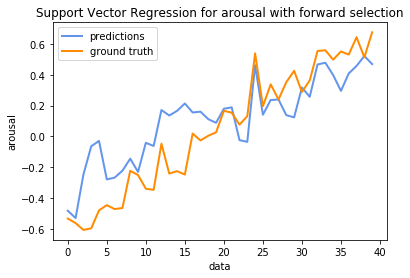

r squared: 0.765742050757
r: 0.875066883591
mse: 0.0485156202864


In [305]:
plot_from_forward_selection(selected_feature_indexes, best_svm)

In [276]:
def trim_without_flatten(feature_list, label_list):
    feature_vector = []
    label_vector = []

    shortest_length = min([len(l) for l in label_list])
    for l in label_list:
        if len(l) == shortest_length:
            label_vector = l

    # For every feature in the shortest list, concatenate the
    # appropriate feature from each list
    for feature_index in range(len(feature_list)):
        trimmed_list = []
        curr_list = feature_list[feature_index]
        
        for list_index in range(shortest_length):
            new_idx = ((list_index + 1) * int(len(curr_list) / shortest_length)) - 1
            new_item = curr_list[new_idx]
            trimmed_list.append(new_item)

        feature_vector.append(trimmed_list)

    return feature_vector, label_vector

In [301]:
trimmed_train_feat, trimmed_train_label = trim_without_flatten(train_feature_vectors, train_label_vectors)
trimmed_test_feat, trimmed_test_label = trim_without_flatten(test_feature_vectors, test_label_vectors)
trimmed_validate_feat, trimmed_validate_label = trim_without_flatten(validate_feature_vectors, validate_label_vectors)
all_train_predictions = []
all_test_predictions = []
all_validate_predictions = []
for i in range(len(trimmed_train_feat)):
    model = candidate_svms[i]
    model.best_estimator_.fit(trimmed_train_feat[i], trimmed_train_label)
    train_predictions = model.predict(trimmed_train_feat[i])
    test_predictions = model.predict(trimmed_test_feat[i])
    validate_predictions = model.predict(trimmed_validate_feat[i])
    all_train_predictions.append(train_predictions)
    all_test_predictions.append(test_predictions)
    all_validate_predictions.append(validate_predictions)
best_hyper_model, input_models = backwardSelect(feat_names, all_train_predictions, trimmed_train_label, all_test_predictions, trimmed_test_label, "r2")



training model...
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
[0, 2, 3, 4, 5, 6, 7, 8, 9]
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
[2, 3, 4, 5, 6, 7, 8, 9]
training model...
training model...
training model...
training model...
training model...
training model...
training model...
training model...
[2, 4, 5, 6, 7, 8, 9]
training model...
training model...
training model...
training model...
training model...
training model...
training model...
[2, 4, 6, 7, 8, 9]
training model...
training model...
training model...
training model...
training model...
training model...
[2, 4, 6, 8, 9]
training model...
training model...
training model...
training model...
training model...
[2, 4, 6, 8]
training model...


In [302]:
input_models

['convnet_8', 'convnet_16']

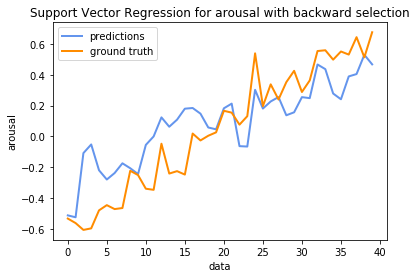

r squared: 0.748216055812
r: 0.864994829934
mse: 0.0503427002491


In [306]:
input_indexes = [feat_names.index(item) for item in input_models]
pred_vec = getPredictionVector(all_validate_predictions, input_indexes)
predictions = best_hyper_model.predict(pred_vec)
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
plt.plot(np.array(range(len(trimmed_validate_label))), trimmed_validate_label, color='darkorange', lw=lw, label='ground truth')
plt.xlabel('data')
plt.ylabel('arousal')
plt.title('Support Vector Regression for arousal with backward selection')
plt.legend()
plt.show()
print 'r squared:', (np.corrcoef(predictions, trimmed_validate_label)[0, 1] ** 2)
print 'r:', (np.corrcoef(predictions, trimmed_validate_label)[0, 1])
print 'mse:', np.mean(((predictions - trimmed_validate_label) ** 2))